# <div style="text-align: center">Hyperparameter Database Project Portfolio</div>

<div style="text-align: center">Team DB11</div>
<div style="text-align: center">Darshan Durve(durve.d@husky.neu.edu)</div>
<div style="text-align: center">Shriram Karthikeyan(karthikeyan.s@husky.neu.edu)</div>

## What is the hyperparameter database and how will it be used?
The hyperparameter database project is an academic project with the goal of creating a database containing a set of important hyperparameters for machine learning models. This database will be a part of a software application where a user uploads a dataset and selects the models that they wish to run on their dataset and the application will look for datasets that are closest to the dataset uploaded by the user and suggest the user the best hyperparameters for the models they wish to run on their dataset.


## Conceptual Model for the Database

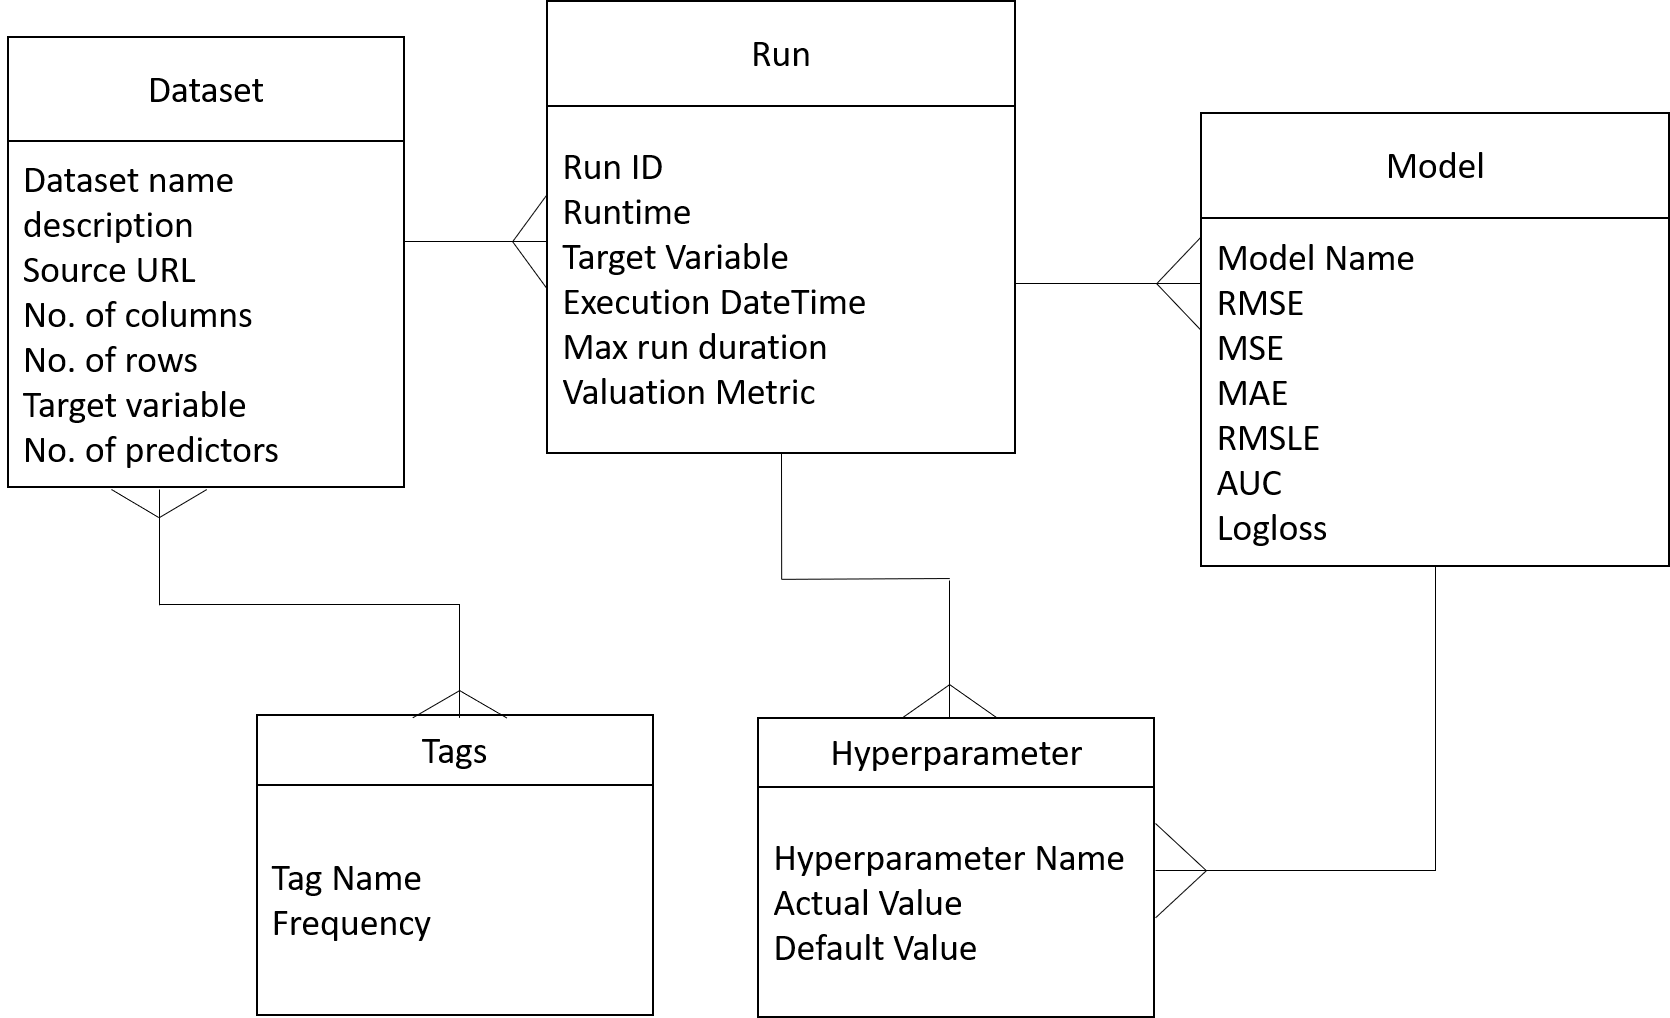

## Database Modeling
After several iterations of design, we chose to settle on modeling our database around “Runs”. One run is an execution of a collection of machine learning models. E.g. a run can contain executions of ML models such as GLM, XGBoost, DRF, etc. in a single execution for a specified maximum runtime set by the user. 
Each run contains multiple models for a specific amount of run time. The Model entity contains the performance metrics for its execution such as RMSE, MSE, AUC, etc. These metrics are used to judge which hyperparameters are the best.
The Hyperparameter entity contains a list of hyperparameters for each model associated with each run. We have related this entity to Run and Model by storing run-id and model-id respectively. Along with this,  we have also stored a table for tags related to each dataset. This is helpful to users for searching the datasets which are similar to datasets in this database and further help them in getting the best hyperparameter. 


## Project Flow Overview

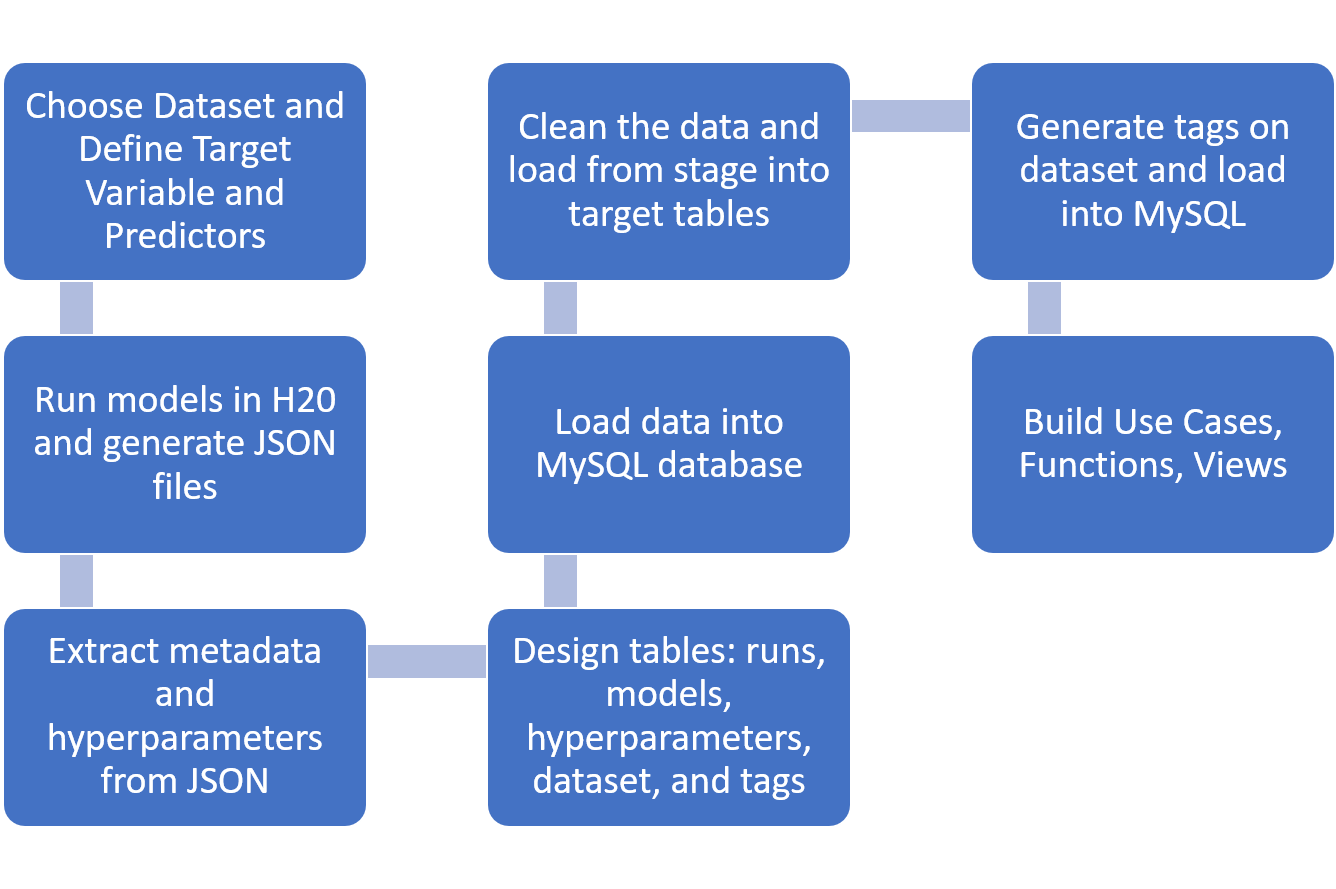

# Project Process
We got the Extracted files from the Data Science team. It consisted of the Metadata about the runs done on the dataset. It also consisted of the Leaderboard Csv which had the models generated by the H20 algorithm for each run and their performance metrics. Along with that, we received a Json file of parameters associated with each model. We Scraped out useful hyperparameters from this file. The Codes used for scraping is as follows: 

## Extracting data from metadata generated by H20 and loading it into a CSV

In [12]:
#import os to walk through the directories and open the files and get their creation time
import os
#import json to read the json metadata files and the hyperparameter files
import json
#import pandas to store the data scraped from the JSON files
import pandas as pd
#import time to format the creation time of the files
import time
#import json_normalize to flatten the json files before storing it in a dataframe
from pandas.io.json import json_normalize
#create and empty dataframe called runs
runs = pd.DataFrame()
#set the root directory as the folder containing the run outputs generated by H20
rootdir ='Extracted Files'
#Loop through the folders and sub-folders in the "Extracted Files" folder
for subdir, dirs, files in os.walk(rootdir):
    #loop through the files
    for file in files:
        #we are interested only in the metadata json files in this section of the code
        if (file.endswith('json') and file.startswith('meta')):
            fullfilepath = subdir+"/"+file
            #open the file
            with open(str(subdir)+"/"+file) as f:
                #load the flattened JSON file into a dictionary
                d = json.load(f)                
                #flatten the dictionary using json_normalize() and append the output to the pandas dataframe that we created earlier called runs
                runs = df.append(json_normalize(d))
                #change the format of the file creation time into a format acceptable by the database
                runs['file_creation_time']=time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(os.path.getctime(subdir+"/"+file)))
            #close the file    
            f.close()
#Export the data frame to csv which we will later directly import into a stage table in our MySQL database
runs.to_csv("Runs.csv",index=False)
runs.head()

C:\Users\shrir\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,analysis,balance,balance_threshold,classification,data_path,end_time,execution_time,file_creation_time,max_models,min_mem_size,...,nthreads,project,run_id,run_path,run_time,scale,server_path,start_time,target,test_path
0,0,False,0.2,False,None,1.555891e+09,0.0,2019-04-26 16:09:35,9,6,...,1,None,58erhH7N2,/content/p7TZ8WufJ/qlXRazR12/58erhH7N2,900,False,/content/p7TZ8WufJ/qlXRazR12,1.555891e+09,T_degC,None
0,0,False,0.2,False,None,1.555892e+09,0.0,2019-04-26 16:09:35,9,6,...,1,None,lOBYWUG72,/content/p7TZ8WufJ/qlXRazR12/58erhH7N2/lOBYWUG72,1100,False,/content/p7TZ8WufJ/qlXRazR12/58erhH7N2,1.555892e+09,T_degC,None
0,0,False,0.2,False,None,1.555890e+09,0.0,2019-04-26 16:09:35,9,6,...,1,None,p7TZ8WufJ,/content/p7TZ8WufJ,500,False,/content,1.555890e+09,T_degC,None
0,0,False,0.2,False,None,1.555890e+09,0.0,2019-04-26 16:09:35,9,6,...,1,None,qlXRazR12,/content/p7TZ8WufJ/qlXRazR12,700,False,/content/p7TZ8WufJ,1.555890e+09,T_degC,None
0,0,False,0.2,False,None,1.555894e+09,0.0,2019-04-26 16:09:35,9,6,...,1,None,xmbfawAR9,/content/p7TZ8WufJ/qlXRazR12/58erhH7N2/lOBYWUG...,1300,False,/content/p7TZ8WufJ/qlXRazR12/58erhH7N2/lOBYWUG72,1.555894e+09,T_degC,None


## Creating Hyperparameter Csv file from Hyperparameter Json

In the code below we loop through hyperparameter list to find their values in the Json files and creating a dataframe out of it.

In [2]:
import json
import pandas as pd
import os.path

#loading the list of hyperparameters into a dictionary
with open('Hyperparameters.txt', "r") as word_list:
    hyperparams = word_list.read().split(' ')
hyperparams = hyperparams[0].split("\n")

hyperparams = list(dict.fromkeys(hyperparams)) #loading into a list to Remove duplicates

#Making a list of files of Json files 
hyperparam_json_files=['Extracted Files/58erhH7N2/hyperparameters_900 (1).json',
                      'Extracted Files/lOBYWUG72/hyperparameters_1100 (1).json',
                      'Extracted Files/p7TZ8WufJ/hyperparameters_500.json',
                      'Extracted Files/qlXRazR12/hyperparameters_700 (1).json',
                      'Extracted Files/xmbfawAR9/hyperparameters_1300 (1).json']


#Preparing lists to load information from the json file
m=[]
h=[]
d=[]
a=[]
id=[]

#loop to iterate through the hyperparameter json files
for file in hyperparam_json_files:
#loading the Json
    with open(file, 'r') as f:
        distros_dict = json.load(f)

#Extracting the data from Json to fit the model 

    i = 0 #Setting the counter
    for item in distros_dict: #looping through every item in the json file
        for hyper in hyperparams: #looping through necessary hyperparamter in the text file
            
            id.append(os.path.dirname(file).split('/')[-1])#getting the run id
            m.append(distros_dict[i]['model_id']['actual']['name'])#name of the model
            h.append(hyper)#getting the hyperparameter
            try:
                d.append(distros_dict[i][hyper]['default'])#getting the default value
            except:
                d.append(None)
            try:
                a.append(distros_dict[i][hyper]['actual'])#getting the actual value
            except:
                a.append(None)
                
        i+=1

#Creating a dataframe to store the data

dataframe = pd.DataFrame({'Run_Id':id,
                          'Model_Name' : m,
                          'Hyperparameter_Name': h,
                          'Default_Value' : d,
                          'Actual_Value' : a})

#dropping records where the hyperparamter is absent for the algorithm

dataframe = dataframe.dropna().reset_index(drop=True)

#Converting to csv
dataframe.to_csv('Hyperparameter.csv',index=False)

dataframe.head()

,Run_Id,Model_Name,Hyperparameter_Name,Default_Value,Actual_Value
0,58erhH7N2,GLM_grid_1_AutoML_20190421_233433_model_1,fold_assignment,AUTO,Modulo
1,58erhH7N2,GLM_grid_1_AutoML_20190421_233433_model_1,max_runtime_secs,0,0
2,58erhH7N2,GLM_grid_1_AutoML_20190421_233433_model_1,balance_classes,False,False
3,58erhH7N2,GLM_grid_1_AutoML_20190421_233433_model_1,max_after_balance_size,5,5
4,58erhH7N2,GLM_grid_1_AutoML_20190421_233433_model_1,seed,-1,623814104656333214


## Creating Model Csv file from Leaderboard Csv

In the following code, we loop through the leaderboard csv and create a dataframe consisting of Run Ids, Model Names and their Performance Metrics

In [8]:
import pandas as pd
import os.path

#Creating a list to load the files
files=[]

#For everyfile ending with .csv load it into 'files'
for filename in os.listdir('Leaderboard CSVs'):
    if filename.endswith(".csv"):# or filename.endswith(".py"): 
        files.append(os.path.join('Leaderboard CSVs', filename))
        continue
    else:
        continue

#looping through the files to get the new dataframe with individual run-ids

run_id = []
i=0
new_df= pd.DataFrame()
for file in files:
    id = os.path.basename(file)
    run_id.append(id.split('_')[0].split('lb')[0])
    df=pd.read_csv(file,index_col=0)
    df.insert(0, 'run_id', run_id[i])
    new_df = new_df.append(df)
    i=i+1

#It is Null since our dataset is a regression one
new_df['auc'] = None
new_df['log_loss'] = None

new_df.to_csv('Leaderboard.csv',index=False)

new_df.head()

,run_id,model_id,mean_residual_deviance,rmse,mse,mae,rmsle,auc,log_loss
0,58erhH7N2,GLM_grid_1_AutoML_20190421_233433_model_1,0.001772,0.042093,0.001772,0.016516,0.005909,None,None
1,58erhH7N2,GLM_grid_1_AutoML_20190421_234613_model_1,0.001772,0.042093,0.001772,0.016516,0.005909,None,None
2,58erhH7N2,GLM_grid_1_AutoML_20190421_232600_model_1,0.001772,0.042093,0.001772,0.016516,0.005909,None,None
3,58erhH7N2,StackedEnsemble_BestOfFamily_AutoML_20190421_2...,0.002628,0.051266,0.002628,0.017612,0.005495,None,None
4,58erhH7N2,StackedEnsemble_AllModels_AutoML_20190421_232600,0.002952,0.054336,0.002952,0.010259,0.005552,None,None


# Visualizations on the Model Data

### Range of RMSE values for different run IDs

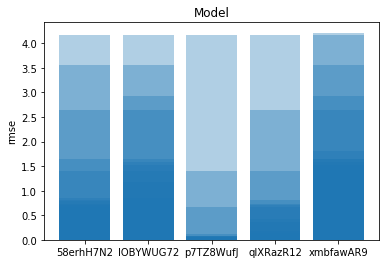

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.bar(new_df['run_id'], new_df['rmse'], align='center', alpha=0.35)
plt.ylabel('rmse')
plt.title('Model')

plt.show()

### Frequency of Metrics

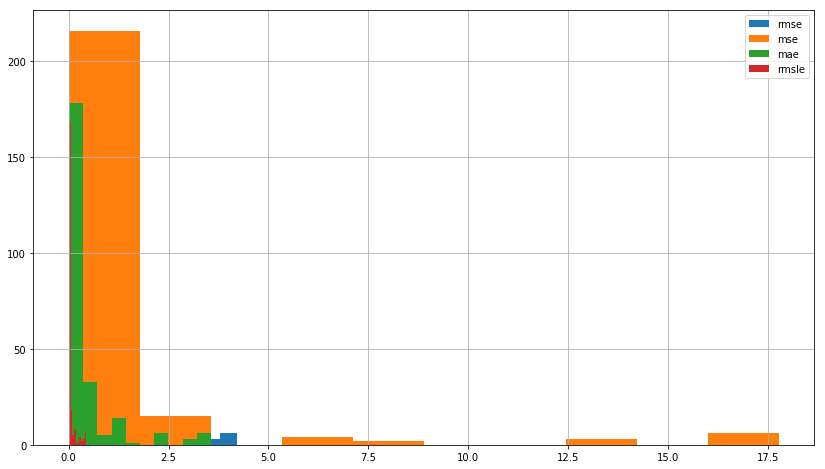

In [12]:
new_df['rmse'].hist(bins=10, label = 'rmse', figsize=(14,8))
new_df['mse'].hist(bins=10, label = 'mse', figsize=(14,8))
new_df['mae'].hist(bins=10, label = 'mae', figsize=(14,8))
new_df['rmsle'].hist(bins=10, label = 'rmsle',  figsize=(14,8))
plt.legend()

### Box plot for performance metrics

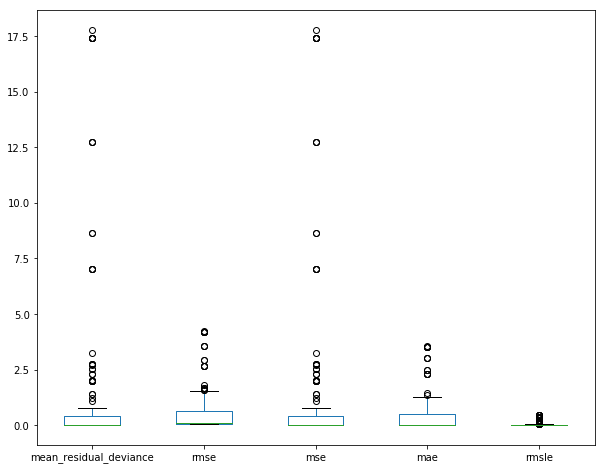

In [29]:
new_df.plot(kind='box', figsize=(10,8))

## Creating tags from the dataset description

Along with the information related to each run, we chose to implement the tags functionality to make it easier for users to search the database for keywords and how often they appear.

In [16]:
text = "The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity."
BAD_CHARS = ".!?,\'\""

# transform text into a list words--removing punctuation and filtering small words
words = [ word.strip(BAD_CHARS) for word in text.strip().split() if len(word) > 4 ]

word_freq = {}

# generate a 'word histogram' for the text--ie, a list of the frequencies of each word
for word in words :
  word_freq[word] = word_freq.get(word, 0) + 1
  
type(word_freq)


# sort the word list by frequency 
# (just a DSU sort, there's a python built-in for this, but i can't remember it)
tx = [ (v, k) for (k, v) in word_freq.items()]
tx.sort(reverse=True)
word_freq_sorted = [ (k, v) for (v, k) in tx ]

# eg, what are the most common words in that text?
tags = pd.DataFrame(word_freq_sorted)

#rename the columns in the tags dataframe as "tags" and "tag_frequency"
tags.columns = ['tag', 'tag_frequency']
#remove tags with numbers for the sake of simplicity when importing the data into MySQL
#tags = df[~df.tag.str.contains(r'\d')]
#Export the tags dataframe to csv to import it later into MySQL
tags.to_csv('tags.csv',index=False)

tags.head()

,tag,tag_frequency
0,California,6
1,biological,4
2,CalCOFI,3
3,zooplankton,2
4,world,2


# Loading the files into the Database

After scraping out the information and creating the tags, we loaded the csv files into our stage tables which we created in the MySql Database. We transformed the data in the stage table to load into our main tables. We joined each table by leveraging primary key and foreign key relationships.

## Final E-R Model of the Database
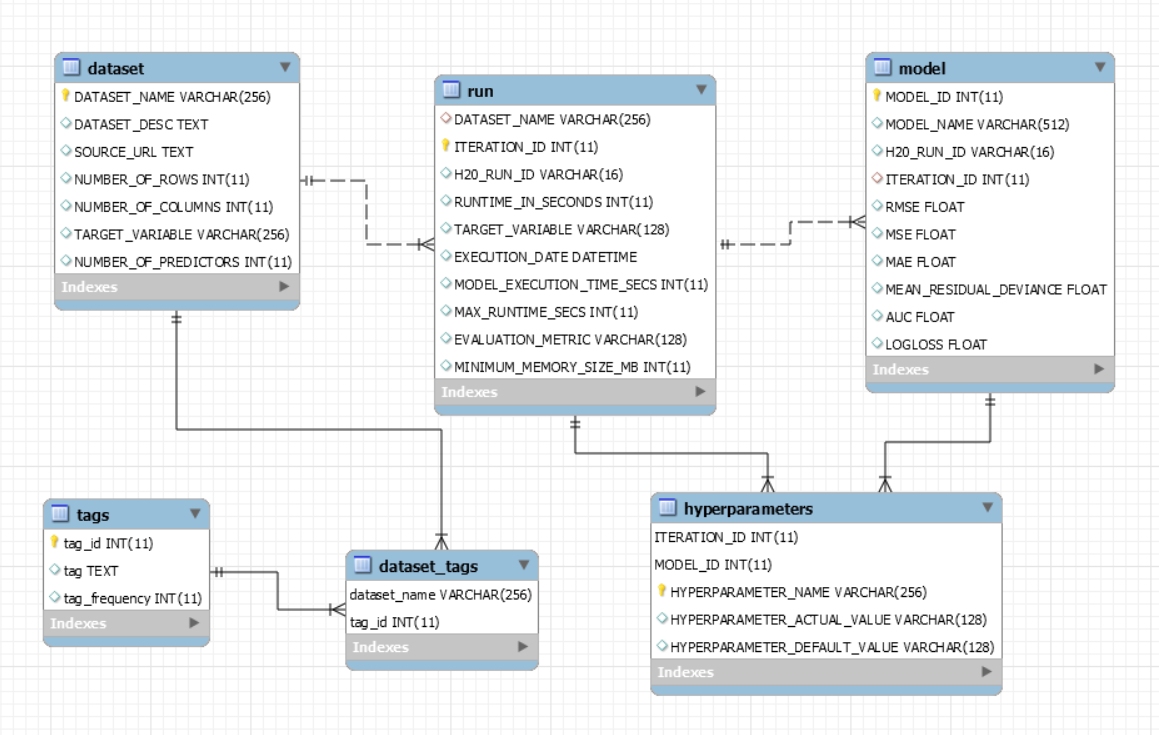

# License

The code in this Hyperparameter project  document by Shriram Karthikeyan and Darshan Durve is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/
The code in the Hyperparameter project  document by Shriram Karthikeyan and Darshan Durve is licensed under the MIT License https://opensource.org/licenses/MIT